In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("god.csv")
g_features = []
g_target = []
count = 0
count2 = 0

for i in range(len(df["diameter"])):
    #g_features.append([df["diameter"][i],df["area"][i],df["radius"][i]])
    if df["status"][i] == 0:
        g_target.append(1)
        g_features.append([df["area"][i],df["radius"][i]])
    elif df["status"][i] == 1:
        g_target.append(0)
        g_features.append([df["area"][i],df["radius"][i]])
        count += 1
    elif df["status"][i] == 2:
        g_target.append(0)
        g_features.append([df["area"][i],df["radius"][i]])
        count2 += 1
    
print(len(g_features))
g_features = np.array(g_features)
g_target = np.array(g_target)

1580


Automatically created module for IPython interactive environment
accuracy_score : 0.7075098814229249
log_loss : 0.5770187248589204

accuracy_score : 0.6600790513833992
log_loss : 0.6206399794370031

accuracy_score : 0.6600790513833992
log_loss : 0.616307718606409

accuracy_score : 0.7391304347826086
log_loss : 0.562934189966751

accuracy_score : 0.7103174603174603
log_loss : 0.5869508261845834



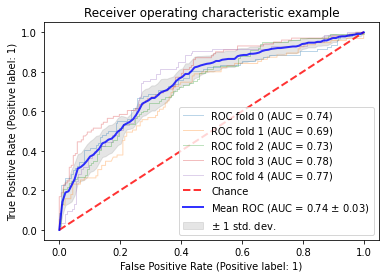

accuracy : 0.7056962025316456
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       157
           1       0.75      0.34      0.47        96

    accuracy                           0.71       253
   macro avg       0.72      0.64      0.63       253
weighted avg       0.72      0.71      0.67       253

              precision    recall  f1-score   support

           0       0.68      0.85      0.76       158
           1       0.58      0.35      0.43        95

    accuracy                           0.66       253
   macro avg       0.63      0.60      0.60       253
weighted avg       0.64      0.66      0.64       253

              precision    recall  f1-score   support

           0       0.66      0.91      0.76       152
           1       0.68      0.28      0.39       101

    accuracy                           0.66       253
   macro avg       0.67      0.60      0.58       253
weighted avg       0.67      0.66      0.62 

In [3]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Data IO and generation

# Import some data to play with
X = g_features
y = g_target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=5,shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
classifier = svm.SVC(probability=True)
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_val)
    history.append(classification_report(y_val,predict))
    clf_probs = classifier.predict_proba(X_val)
    acc = accuracy_score(y_val, predict)
    accuracy.append(acc)
    loss = log_loss(y_val, clf_probs)
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('Graph/svm_glaucoma_graph.jpg')
plt.show()
predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

for i in range(len(history)):
    print(history[i])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

#report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

#plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.savefig('Matrix/svm_glaucoma_confusion_matrix.jpg')

In [4]:
a = np.array([[0.4,0.2]])
a = a.reshape(-1,2)
predict = classifier.predict(a)
print(predict)


[0]


Automatically created module for IPython interactive environment
accuracy_score : 0.6758893280632411
log_loss : 2.7668330709223072

accuracy_score : 0.6679841897233202
log_loss : 3.8455292855112524

accuracy_score : 0.7035573122529645
log_loss : 1.5539476815640783

accuracy_score : 0.6561264822134387
log_loss : 2.4086653563338145

accuracy_score : 0.6507936507936508
log_loss : 3.0439386715317562



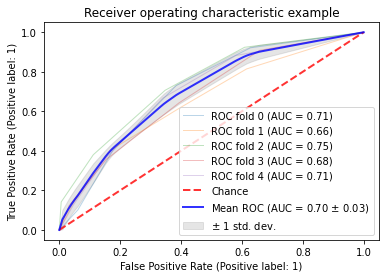

accuracy : 0.7246835443037974
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       164
           1       0.55      0.40      0.47        89

    accuracy                           0.68       253
   macro avg       0.64      0.61      0.62       253
weighted avg       0.66      0.68      0.66       253

              precision    recall  f1-score   support

           0       0.69      0.83      0.76       156
           1       0.60      0.40      0.48        97

    accuracy                           0.67       253
   macro avg       0.65      0.62      0.62       253
weighted avg       0.66      0.67      0.65       253

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       161
           1       0.66      0.38      0.48        92

    accuracy                           0.70       253
   macro avg       0.69      0.63      0.64       253
weighted avg       0.70      0.70      0.68 

In [5]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
#from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Data IO and generation

# Import some data to play with
X = g_features
y = g_target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=5,shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=random_state)
classifier = KNeighborsClassifier(n_neighbors=4)
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_val)
    history.append(classification_report(y_val,predict))
    clf_probs = classifier.predict_proba(X_val)
    acc = accuracy_score(y_val, predict)
    accuracy.append(acc)
    loss = log_loss(y_val, clf_probs)
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('Graph/knn_glaucoma_graph.jpg')
plt.show()
predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

for i in range(len(history)):
    print(history[i])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

#report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

#plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.savefig('Matrix/knn_glaucoma_confusion_matrix.jpg')

In [6]:
a = np.array([[0.4,0.2]])
a = a.reshape(-1,2)
predict = classifier.predict(a)
print(predict)

[0]


Automatically created module for IPython interactive environment
accuracy_score : 0.7075098814229249
log_loss : 0.5813053277886904

accuracy_score : 0.6758893280632411
log_loss : 0.6017869362046614

accuracy_score : 0.6837944664031621
log_loss : 0.5773659118183676

accuracy_score : 0.7114624505928854
log_loss : 0.5539479640461837

accuracy_score : 0.6825396825396826
log_loss : 0.5677328076906117



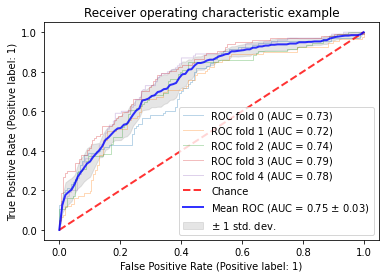

accuracy : 0.7088607594936709
              precision    recall  f1-score   support

           0       0.70      0.92      0.80       158
           1       0.73      0.35      0.47        95

    accuracy                           0.71       253
   macro avg       0.72      0.64      0.63       253
weighted avg       0.71      0.71      0.68       253

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       161
           1       0.60      0.34      0.43        92

    accuracy                           0.68       253
   macro avg       0.65      0.60      0.60       253
weighted avg       0.66      0.68      0.65       253

              precision    recall  f1-score   support

           0       0.70      0.87      0.78       159
           1       0.62      0.37      0.47        94

    accuracy                           0.68       253
   macro avg       0.66      0.62      0.62       253
weighted avg       0.67      0.68      0.66 

In [7]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
#from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Data IO and generation

# Import some data to play with
X = g_features
y = g_target
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=5,shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=random_state)
classifier = LogisticRegression(random_state=random_state)
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_val)
    history.append(classification_report(y_val,predict))
    clf_probs = classifier.predict_proba(X_val)
    acc = accuracy_score(y_val, predict)
    accuracy.append(acc)
    loss = log_loss(y_val, clf_probs)
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('Graph/lg_glaucoma_graph.jpg')
plt.show()
predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

for i in range(len(history)):
    print(history[i])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

#report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

#plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.savefig('Matrix/lg_glaucoma_confusion_matrix.jpg')

In [8]:
a = np.array([[0.4,0.2]])
a = a.reshape(-1,2)
predict = classifier.predict(a)
print(predict)

[0]


Automatically created module for IPython interactive environment
accuracy_score : 0.6719367588932806
log_loss : 0.7062621853480336

accuracy_score : 0.7233201581027668
log_loss : 0.5795585949240422

accuracy_score : 0.6640316205533597
log_loss : 0.6783865725386178

accuracy_score : 0.7351778656126482
log_loss : 0.5587485431164638

accuracy_score : 0.6746031746031746
log_loss : 0.6940442067304208



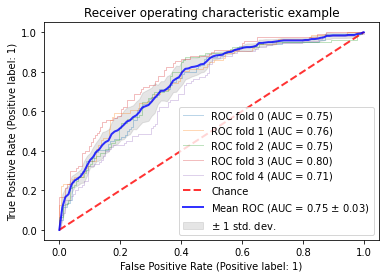

accuracy : 0.6993670886075949
              precision    recall  f1-score   support

           0       0.67      0.86      0.76       149
           1       0.67      0.40      0.50       104

    accuracy                           0.67       253
   macro avg       0.67      0.63      0.63       253
weighted avg       0.67      0.67      0.65       253

              precision    recall  f1-score   support

           0       0.75      0.86      0.80       167
           1       0.63      0.45      0.53        86

    accuracy                           0.72       253
   macro avg       0.69      0.66      0.67       253
weighted avg       0.71      0.72      0.71       253

              precision    recall  f1-score   support

           0       0.67      0.84      0.75       148
           1       0.65      0.41      0.50       105

    accuracy                           0.66       253
   macro avg       0.66      0.63      0.62       253
weighted avg       0.66      0.66      0.65 

In [9]:
#cross-validation and plot ROC curves
print(__doc__)

import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import StratifiedShuffleSplit

# #############################################################################
# Data IO and generation

# Import some data to play with
X = g_features
y = g_target

n_samples, n_features = X.shape


# Add noisy features
random_state = np.random.RandomState(0)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
# #############################################################################
# Classification and ROC analysis


# Run classifier with cross-validation and plot ROC curves

cv = StratifiedKFold(n_splits=5,shuffle=True)
#cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
classifier = GaussianNB()
history = []
accuracy = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    
    X_train, X_val = X[train], X[val]
    y_train, y_val= y[train], y[val]
    classifier.fit(X_train, y_train)
    predict = classifier.predict(X_val)
    history.append(classification_report(y_val,predict))
    clf_probs = classifier.predict_proba(X_val)
    acc = accuracy_score(y_val, predict)
    accuracy.append(acc)
    loss = log_loss(y_val, clf_probs)
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")
    viz = plot_roc_curve(classifier, X[val], y[val],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.savefig('Graph/nb_glaucoma_graph.jpg')
plt.show()
predict = classifier.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

for i in range(len(history)):
    print(history[i])

In [ ]:
from sklearn.metrics import plot_confusion_matrix

#report
predict = classifier.predict(X_test)
print(classification_report(y_test,predict))
print(accuracy_score(y_test, predict))

#plot cofusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.savefig('Matrix/nb_glaucoma_confusion_matrix.jpg')

In [9]:
a = np.array([[0.8,0.3]])
a = a.reshape(-1,2)
predict = classifier.predict(a)
print(predict)

[1]
